
# **Google collab de notre projet**
BARBEDETTE Corentin et MARCHE Jules

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Charger les données
df = pd.read_csv("https://gist.githubusercontent.com/julesmarche/e24d698ad90feb61e118714f09b2cb97/raw/e98a93a05985fece3a01a652cdd624c6dee61e1d/wine-dataset")

# **Dataset Exploratory Analysis**
## **Métadonnées : Nombre d'instances, nombre de caractéristiques, types de données**


In [2]:
# 1. Métadonnées : Nombre d'instances, nombre de caractéristiques, types de données

# Nombre d'instances (lignes) et de caractéristiques (colonnes)
num_instances = df.shape[0]
num_features = df.shape[1]

# Types de données pour chaque colonne
data_types = df.dtypes

# Affichage des résultats
print(f"Nombre d'instances : {num_instances}")
print(f"Nombre de caractéristiques : {num_features}")
print("\nTypes de données des caractéristiques :")
print(data_types)


Nombre d'instances : 1599
Nombre de caractéristiques : 12

Types de données des caractéristiques :
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



Le dataset comporte 12 caractéristiques. Voici un aperçu des types des colonnes :

*   fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol : variables numériques (**float**).

*   quality : variable catégorielle (**int**) représentant la qualité du vin.

Notre variable cible sera **quality**


## **Identifications des valeurs manquantes (nulls ou NA)**

In [3]:
# Vérification des valeurs manquantes dans chaque colonne
missing_values = df.isnull().sum()

# Affichage du nombre de valeurs manquantes pour chaque caractéristique
print("Nombre de valeurs manquantes pour chaque caractéristique :")
print(missing_values)

# Nombre total de valeurs manquantes dans l'ensemble du dataset
total_missing = missing_values.sum()
print(f"\nNombre total de valeurs manquantes dans le dataset : {total_missing}")


Nombre de valeurs manquantes pour chaque caractéristique :
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Nombre total de valeurs manquantes dans le dataset : 0


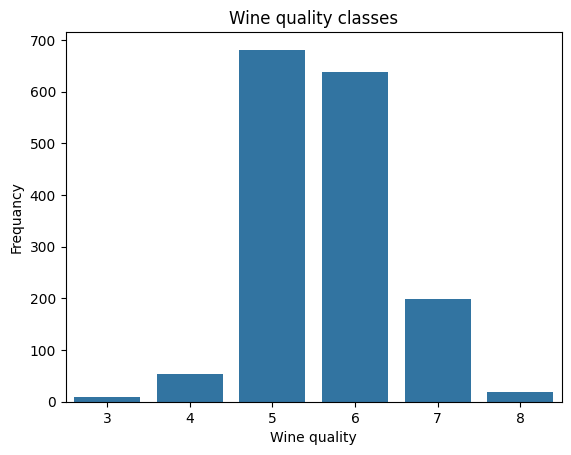

In [4]:
# Wine quality classes frequancy
sns.countplot(x= df['quality'])
plt.xlabel('Wine quality')
plt.ylabel('Frequancy')
plt.title('Wine quality classes');

## **Distribution des caractéristiques (Outliers et mise à l'échelle) :**

<Figure size 1500x1000 with 0 Axes>

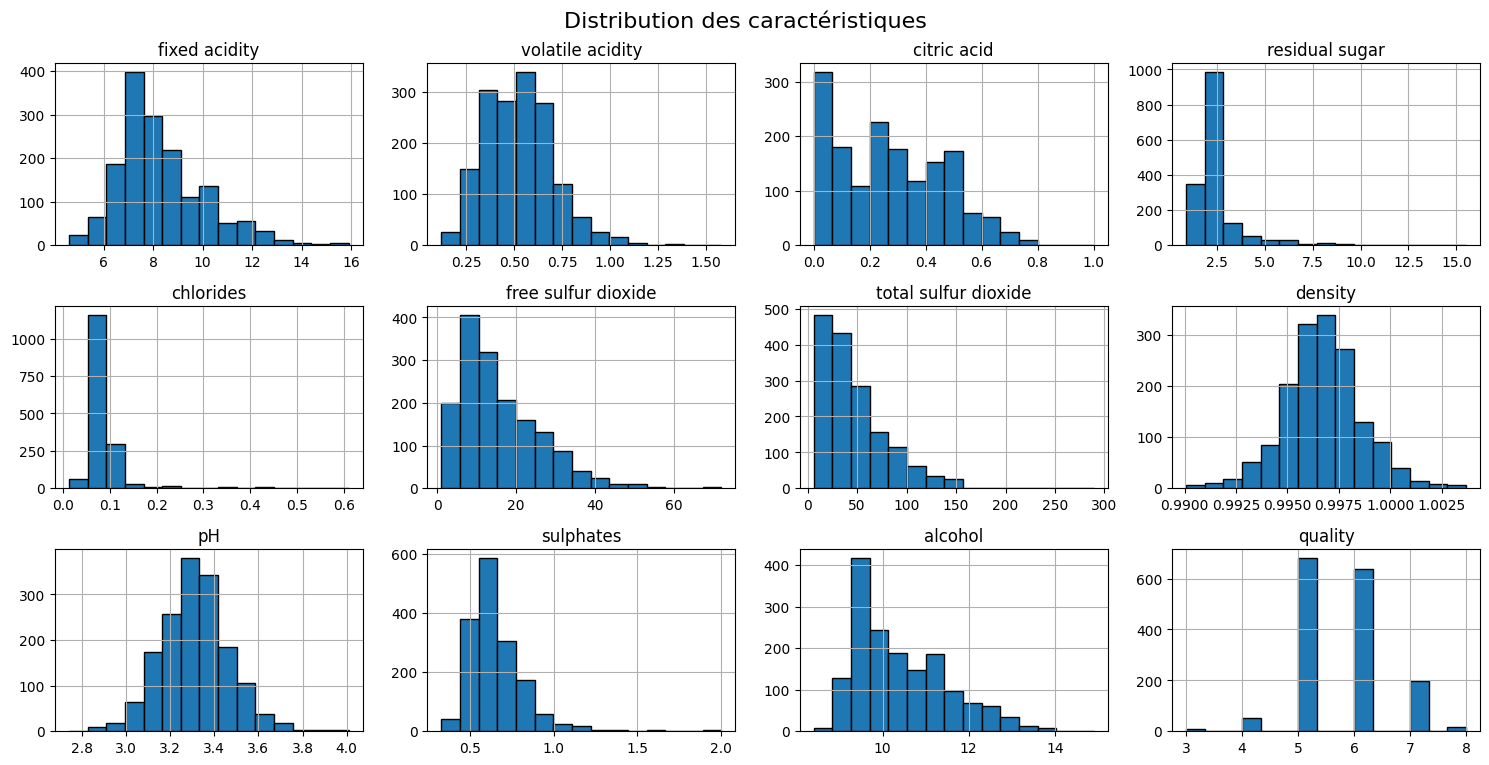

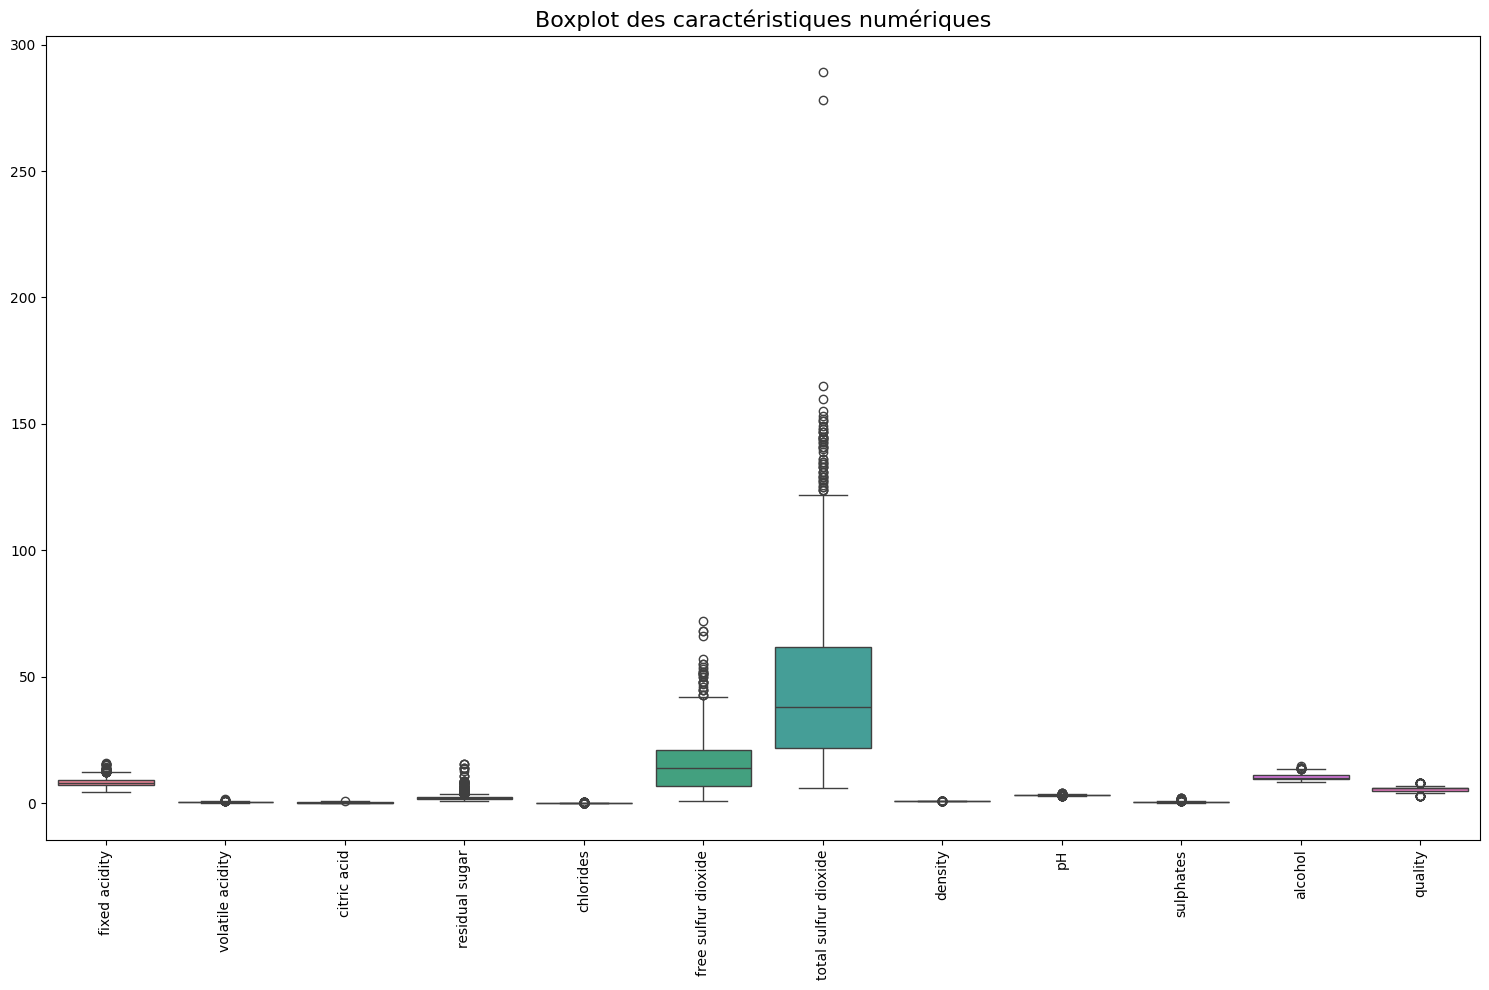

<Figure size 1500x1000 with 0 Axes>

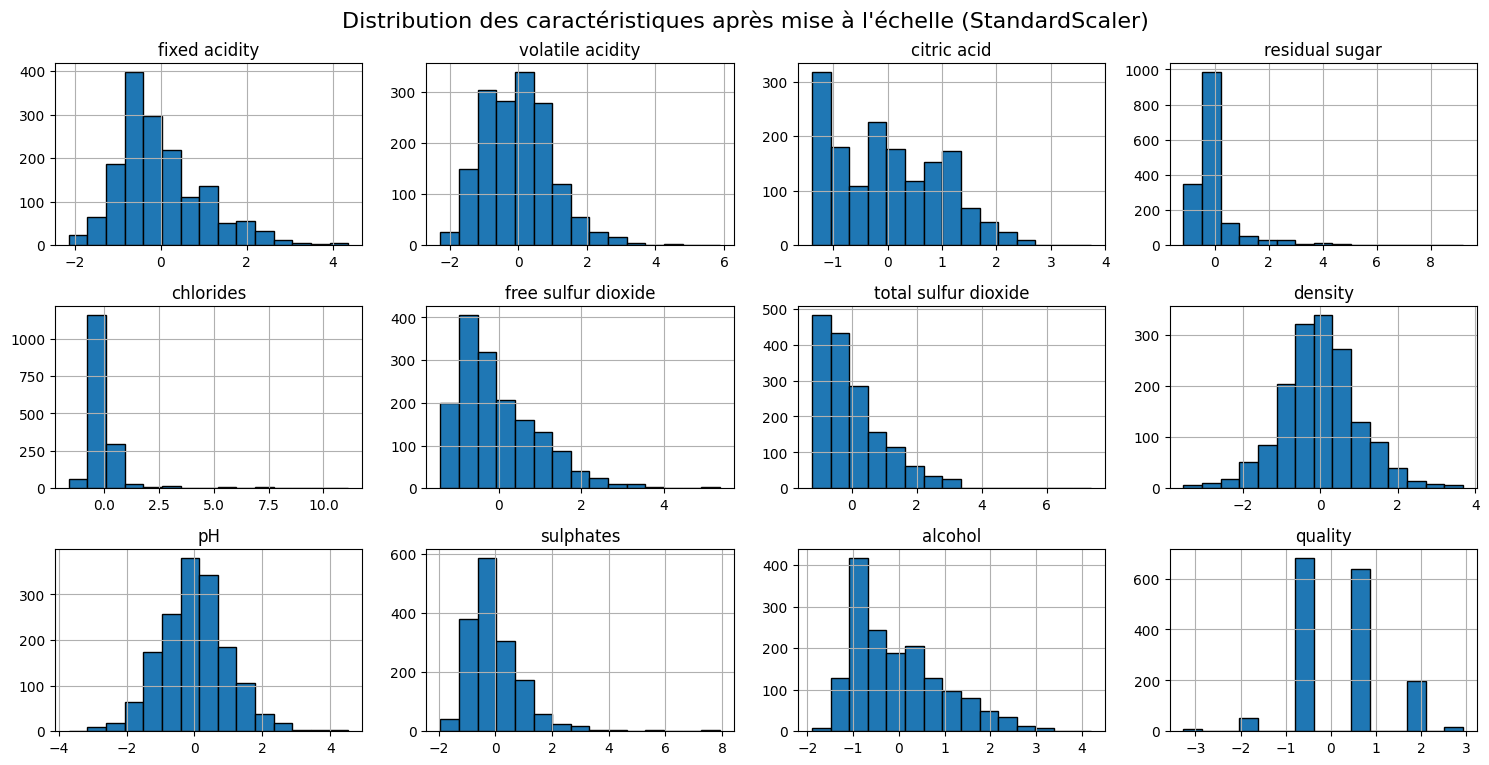

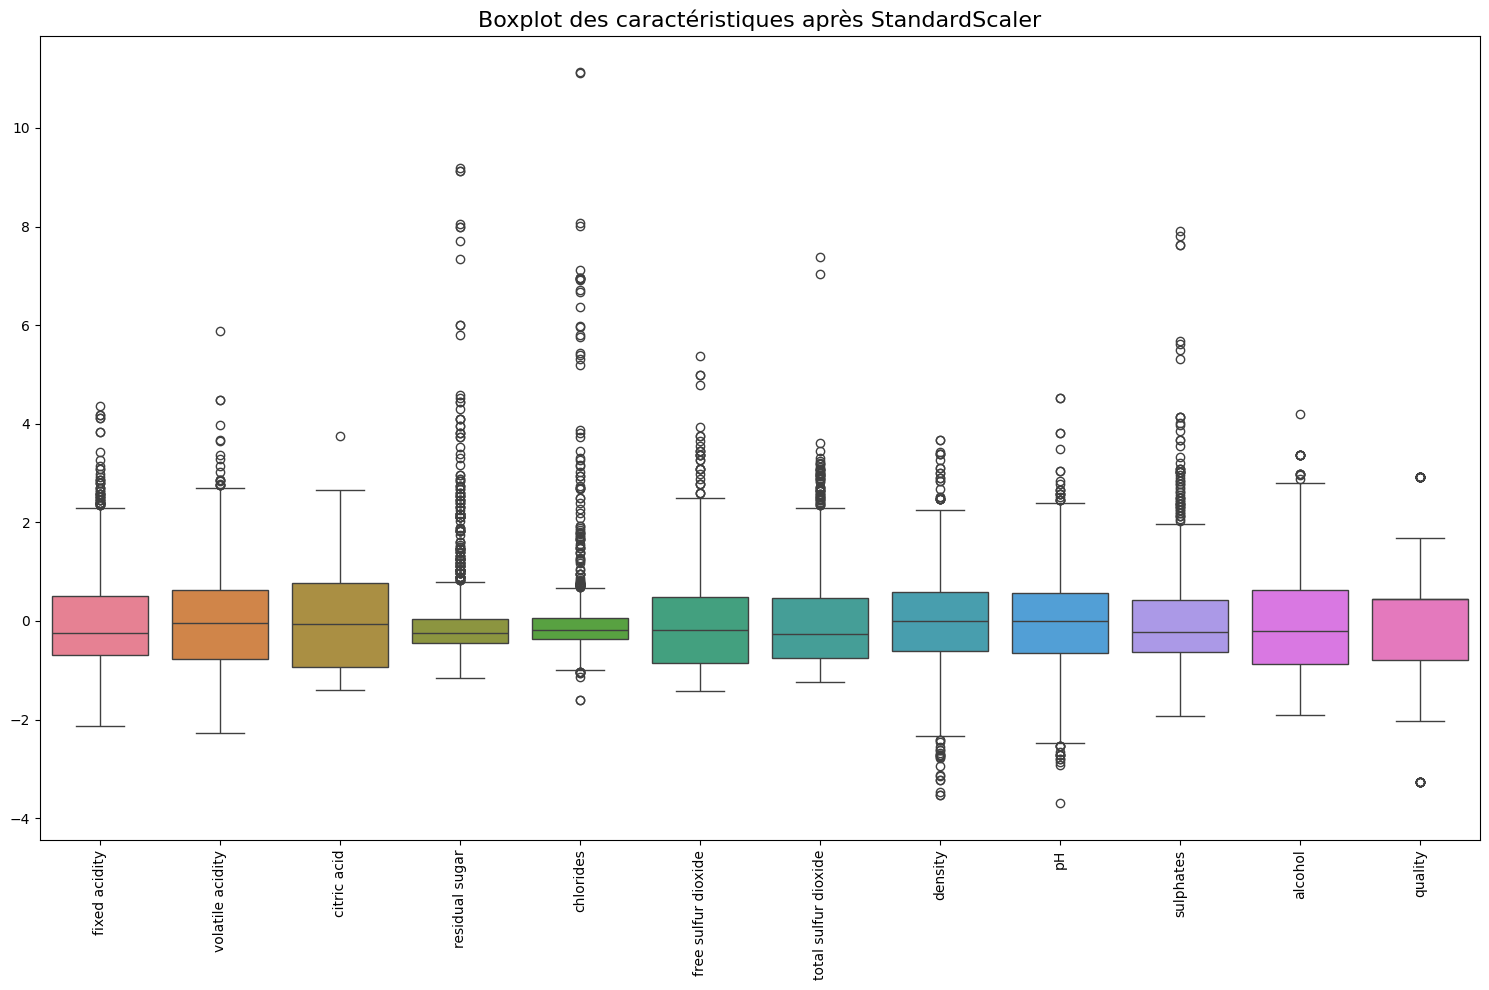

In [5]:


# 1. Visualisation des distributions des caractéristiques (Histogrammes)
plt.figure(figsize=(15, 10))
df.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.suptitle("Distribution des caractéristiques", fontsize=16)
plt.tight_layout()
plt.show()

# 2. Détection des outliers avec les boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplot des caractéristiques numériques", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Normalisation avec StandardScaler (centrer et réduire)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 4. Visualisation après mise à l'échelle
plt.figure(figsize=(15, 10))
df_scaled.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.suptitle("Distribution des caractéristiques après mise à l'échelle (StandardScaler)", fontsize=16)
plt.tight_layout()
plt.show()

# 5. Boxplot après mise à l'échelle avec StandardScaler
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_scaled)
plt.title("Boxplot des caractéristiques après StandardScaler", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Analyse :**

Pour chaque caractéristiques, certaines distributions suivent une forme gaussienne et d'autres sont asymétriques. On peux également observer la présence d’éventuelles valeurs extrêmes (outliers) ou de pics inattendus.

Grâce à ces résultats, on peux indiquer si les caractéristiques nécessitant une normalisation ou standardisation.

Ensuite on normalise avec StandartScaler pour transformer les données et obtenir une moyenne centrée à 0 et un écart-type de 1.
Les valeurs sont maintenant comparables en termes de variance, ce qui est essentiel pour les modèles sensibles à l'échelle des données. Maintenant que les caractéristiques, initialement à des échelles différentes (ex : pH vs. residual_sugar) sont désormais sur la même échelle, cela facilite les comparaisons et prépare les données pour des modèles comme la régression ou les algorithmes de clustering. Finalement, la standardisation permet une meilleure performance pour les modèles utilisant des distances (comme KNN, SVM ou PCA) même si elle peux toutefois réduire l’interprétabilité directe des caractéristiques.

Après la mise à l'échelle, si certaines caractéristiques présentent encore une forte asymétrique ou des outliers, une transformation supplémentaire pourrait être nécessaire (par exemple, une transformation logarithmique).

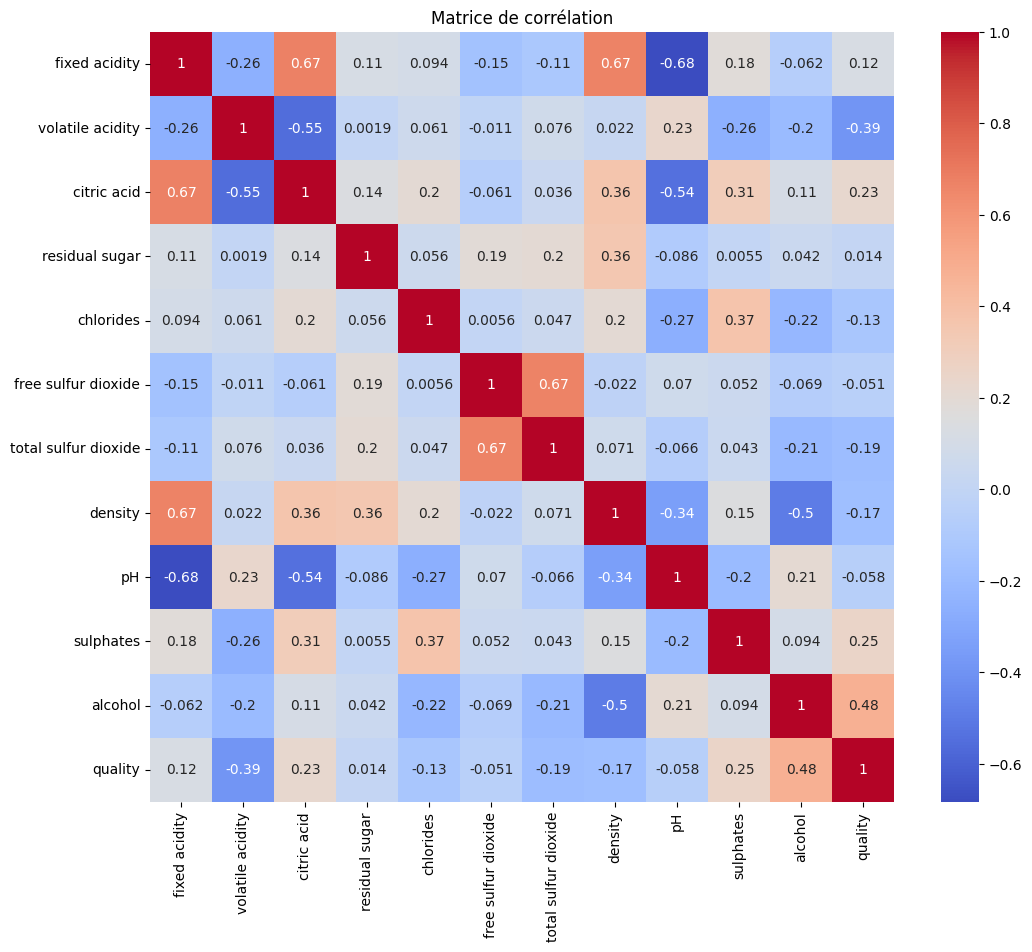

In [6]:
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


**Analyse :**

La matrice de corrélation entre les caractéristiques du dataset standardisé nous permet de mesurer la corrélation avec le coefficient de Pearson (valeurs entre -1 et 1) : 1 : Corrélation positive parfaite. -1 : Corrélation négative parfaite. 0 : Aucune corrélation.

Une heatmap est utilisée pour visualiser ces relations, avec des couleurs pour refléter les intensités des corrélations.

Les valeurs proches de 1 indiquent que deux caractéristiques augmentent simultanément. Par exemple, des caractéristiques comme fixed_acidity et density sont fortement corrélées.

Les valeurs proches de -1 indiquent que lorsqu'une caractéristique augmente, l'autre diminue. Par exemple, la caractéristique alcohol est négativement corrélé avec density (plus l'alcool est élevé, plus la densité diminue).

Les vlauers proches de 0 indiquent qu'il n'y a pas de lien linéaire direct entre deux caractéristiques. Par exemple, certaines caractéristiques comme residual sugar et sulphates n'ont pas de relation évidente.

Si des caractéristiques sont fortement corrélées entre elles, il est possible de supprimer certaines colonnes redondantes.

Les caractéristiques ayant une corrélation élevée avec quality (par exemple, alcohol ou volatile_acidity) devraient être prioritaires dans les analyses ou la modélisation.

Ces relations peuvent guider la sélection des variables importantes pour les modèles prédictifs.

In [7]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df["quality"]
y = df["quality"]
x = df.drop("quality", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = True,random_state = 1)

Étant donné que notre dataset est trop peu fourni, nous avons trouvé des inégalités dans la répartitions des notes. Il y a, par exemple, très peu de vins notés 3 ou 8 par exemple. Pour pallier les incohérences, nous avons décidé de décomposer ces valeurs en 2 groupes :

*   Un groupe pour les vins avec une note inférieure ou égale à 5
*   Un deuxième groupe pour les vins notés supérieur à 5





## **ML Baseline & Ensemble Models**

**L'accuracy** est une mesure de la proportion correcte des prédictions faites par le modèle.

**La precision** indique la proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle.

**Le recall** montre la proportion de cas positifs qui ont été correctement identifiés par le modèle.

**Le F1-score** est la moyenne harmonique entre la précision et le rappel.

**Le support** indique le nombre d'exemples dans chaque classe.

In [8]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
score = accuracy_score(y_test, y_pred)

print(f"Accuracy Score is {score}\n")
print(classification_report(y_test, y_pred))

Accuracy Score is 0.8125

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       188
           1       0.84      0.79      0.82       212

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



**Analyse RandomForest :**

Modèle le plus performant en termes d'accuracy (82.25%) et d'équilibre entre précision, rappel et F1-score. Il montre de bonnes performances pour les deux classes.



In [9]:
k=KNeighborsClassifier()
k.fit(x_train,y_train)
y_pred=k.predict(x_test)
score = accuracy_score(y_test, y_pred)

print(f"Accuracy Score is {score}\n")
print(classification_report(y_test, y_pred))

Accuracy Score is 0.645

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       188
           1       0.68      0.64      0.66       212

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.64       400
weighted avg       0.65      0.65      0.65       400




**KNeighborsClassifier :** Moins performant avec une accuracy de 64.5%, ce qui suggère qu'il a des difficultés à classer correctement. Il est en particulier moins performant en termes de précision pour la classe 0.

In [10]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
y_pred=lgr.predict(x_test)
score = accuracy_score(y_test, y_pred)

print(f"Accuracy Score is {score}\n")
print(classification_report(y_test, y_pred))

Accuracy Score is 0.75

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       188
           1       0.76      0.76      0.76       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



**LogisticRegression :** Performance intermédiaire avec une accuracy de 75%. Ce modèle a des résultats assez équilibrés entre précision et rappel.



**Analyse globale :**
On peux conclure que RandomForest est le modèle le plus performant parmi les trois, avec une bonne précision pour les deux classes et une bonne performance globale. En revanche, KNeighborsClassifier semble être moins efficace et nécessite probablement une optimisation ou un ajustement de ses hyperparamètres. LogisticRegression offre un bon compromis avec des résultats équilibrés et pourrait également être une option intéressante à approfondir.